In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
import seaborn as sns
colors = sns.color_palette()

import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot, draw_collections
from pandapower.plotting import create_bus_collection
from pandapower.plotting import create_line_collection
from pandapower.plotting import create_trafo_collection

In [3]:
net1354 = pn.case1354pegase()

net1354.bus_geodata.to_excel('geodata.xlsx')

pp.to_excel(net1354, 'net1354.xlsx')

/Users/yadongzhang/Library/Python/3.9/lib/python/site-packages/pandapower/file_io.py:99: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [4]:
# Check whether there are more than 1 load or gen at each bus
np.unique(net1354.load.bus).shape[0] == net1354.load.shape[0], np.unique(net1354.gen.bus).shape[0] == net1354.gen.shape[0]

(True, True)

#### Select buses in each zone

In [5]:
# Read geodata
geodata = pd.read_excel('geodata.xlsx', index_col=0)

# get origin
origin_x = 4
origin_y = 3

# Get relative location
geodata['x'] -= 4
geodata['y'] -= 3

In [6]:
k1, k2 = 1, -1

zone1_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] < k1*geodata['x'])
zone2_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] > k1*geodata['x'])
zone3_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] > k2*geodata['x'])
zone4_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] < k2*geodata['x'])
zone5_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] > k1*geodata['x'])
zone6_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] < k1*geodata['x'])
zone7_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] < k2*geodata['x'])
zone8_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] > k2*geodata['x'])

In [7]:
# Select buses in each zone
###### The bus no. in geodata is not monotonically ascending #########
zone1_bus = (geodata.index.values+1)[zone1_bidx]
zone2_bus = (geodata.index.values+1)[zone2_bidx]
zone3_bus = (geodata.index.values+1)[zone3_bidx]
zone4_bus = (geodata.index.values+1)[zone4_bidx]
zone5_bus = (geodata.index.values+1)[zone5_bidx]
zone6_bus = (geodata.index.values+1)[zone6_bidx]
zone7_bus = (geodata.index.values+1)[zone7_bidx]
zone8_bus = (geodata.index.values+1)[zone8_bidx]

In [8]:
zone1_bidx.sum(), zone2_bidx.sum(), zone3_bidx.sum(), zone4_bidx.sum(), zone5_bidx.sum(), zone6_bidx.sum(), zone7_bidx.sum(), zone8_bidx.sum()

(160, 129, 157, 221, 248, 173, 160, 106)

In [9]:
zone1_bidx.sum() + zone2_bidx.sum() + zone3_bidx.sum() + zone4_bidx.sum() + zone5_bidx.sum() + zone6_bidx.sum() + zone7_bidx.sum() + zone8_bidx.sum()

1354

In [10]:
zone1_bus.min(), zone2_bus.min(), zone3_bus.min(), zone4_bus.min(), zone5_bus.min(), zone6_bus.min(), zone7_bus.min(), zone8_bus.min()

(2, 6, 1, 18, 4, 3, 23, 11)

The number of given colors (1) is smaller than the number of nodes (160) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (129) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (157) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (221) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (248) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (173) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (160) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (106) to draw! The colors will be repeated to fit.
use_bus_geodata is automatically set to True, since net.

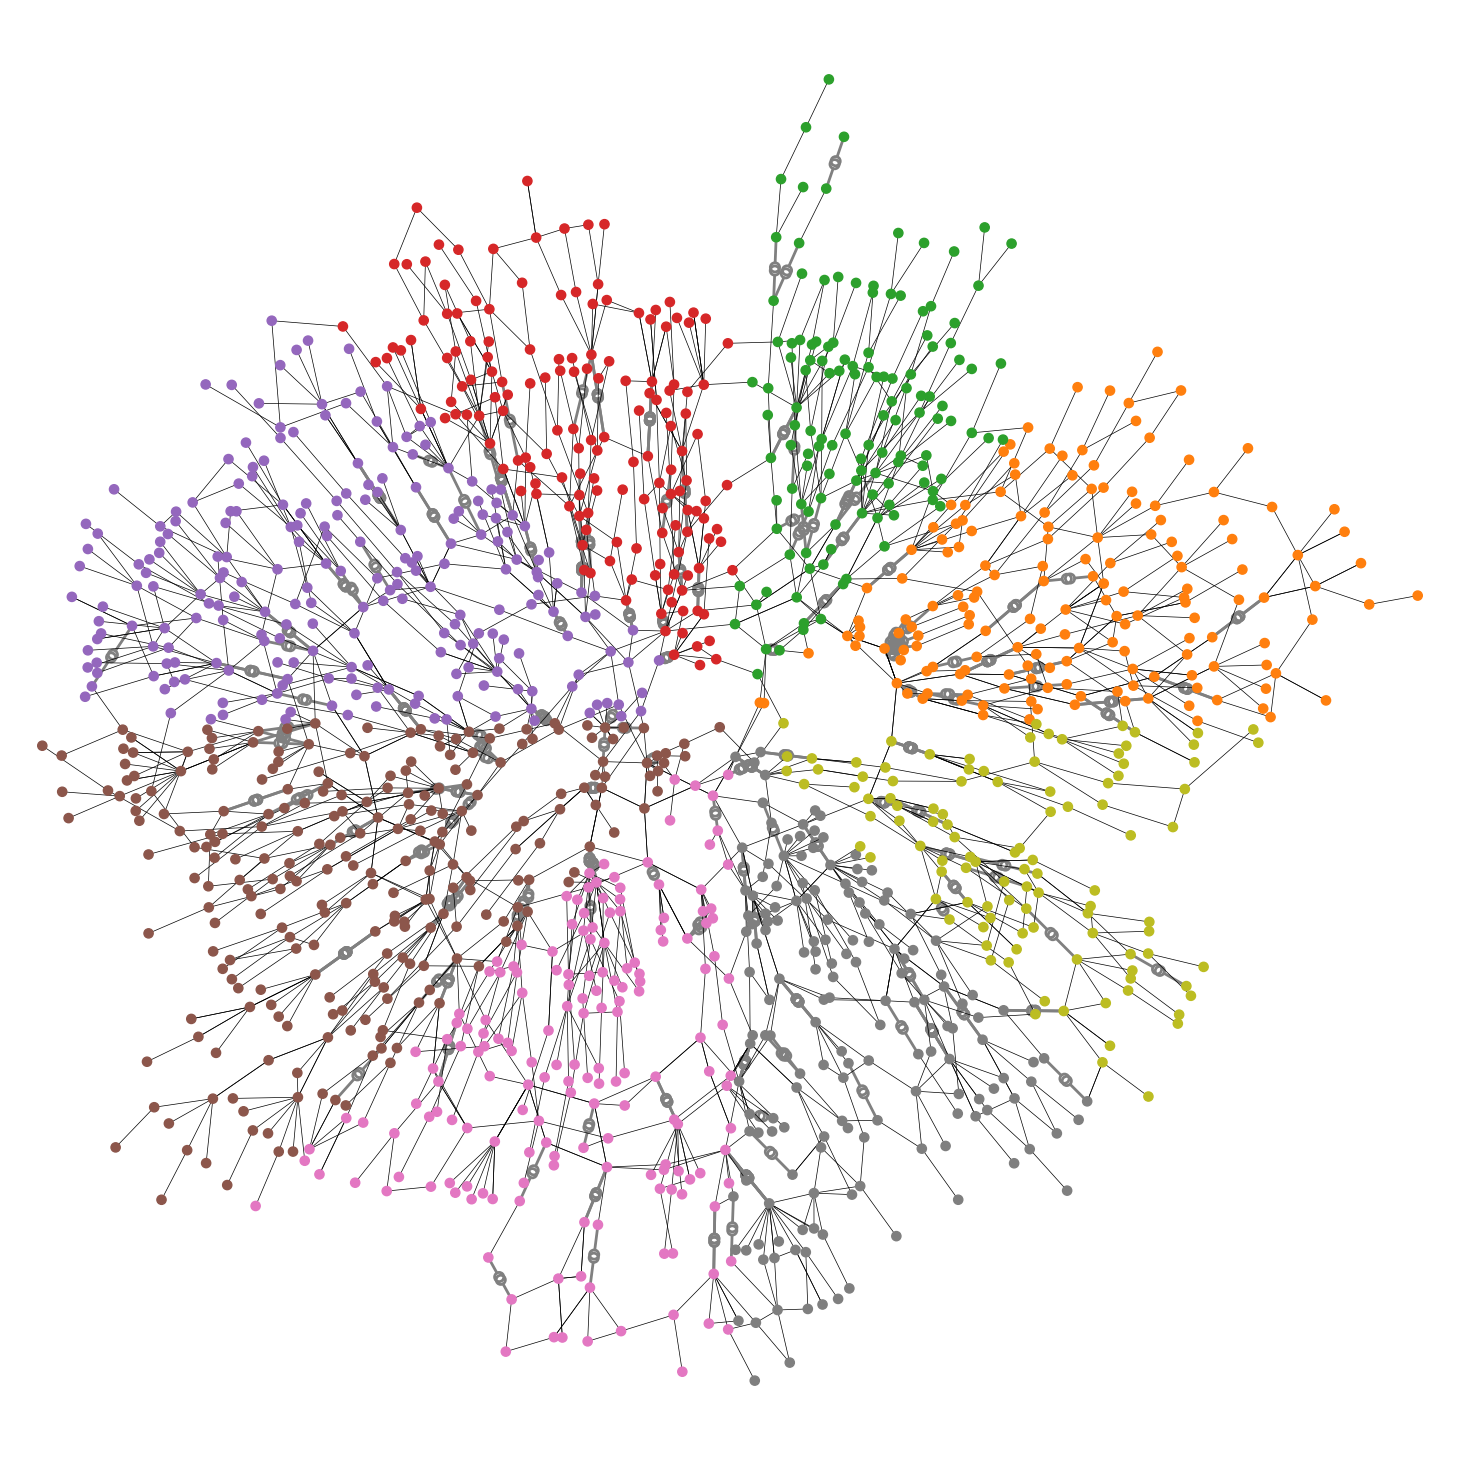

In [12]:
# Create bus collections (bus_geodata is used as coordinate)
zone1_bc = create_bus_collection(net1354, buses=zone1_bus-1, color=colors[1], size=0.1)
zone2_bc = create_bus_collection(net1354, buses=zone2_bus-1, color=colors[2], size=0.1)
zone3_bc = create_bus_collection(net1354, buses=zone3_bus-1, color=colors[3], size=0.1)
zone4_bc = create_bus_collection(net1354, buses=zone4_bus-1, color=colors[4], size=0.1)
zone5_bc = create_bus_collection(net1354, buses=zone5_bus-1, color=colors[5], size=0.1)
zone6_bc = create_bus_collection(net1354, buses=zone6_bus-1, color=colors[6], size=0.1)
zone7_bc = create_bus_collection(net1354, buses=zone7_bus-1, color=colors[7], size=0.1)
zone8_bc = create_bus_collection(net1354, buses=zone8_bus-1, color=colors[8], size=0.1)

# Create line collection
lc = create_line_collection(net1354, color='black', linewidth=0.5, zorder=-100)

# Create trafo collection
tc = create_trafo_collection(net1354, color='gray', size=0.1, zorder=-200)

zone_list = [zone1_bc, zone2_bc, zone3_bc, zone4_bc, zone5_bc, zone6_bc, zone7_bc, zone8_bc, lc, tc]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
draw_collections(zone_list, ax=ax)
fig.savefig('Case1354pegase.pdf')

plt.tight_layout()
plt.show()
plt.close('all')

In [13]:
# Select load buses in each zone
load_bus = np.array(net1354.load.bus) + 1
zone1_load_bus = load_bus[np.isin(load_bus, zone1_bus)]
zone2_load_bus = load_bus[np.isin(load_bus, zone2_bus)]
zone3_load_bus = load_bus[np.isin(load_bus, zone3_bus)]
zone4_load_bus = load_bus[np.isin(load_bus, zone4_bus)]
zone5_load_bus = load_bus[np.isin(load_bus, zone5_bus)]
zone6_load_bus = load_bus[np.isin(load_bus, zone6_bus)]
zone7_load_bus = load_bus[np.isin(load_bus, zone7_bus)]
zone8_load_bus = load_bus[np.isin(load_bus, zone8_bus)]

In [14]:
# Concatenate gen and slack bus
gen_bus = np.concatenate([np.array(net1354.gen.bus), np.array(net1354.ext_grid.bus)])
gen_bus = np.sort(gen_bus) + 1

# Select gen buses in each zone
zone1_gen_bus = gen_bus[np.isin(gen_bus, zone1_bus)]
zone2_gen_bus = gen_bus[np.isin(gen_bus, zone2_bus)]
zone3_gen_bus = gen_bus[np.isin(gen_bus, zone3_bus)]
zone4_gen_bus = gen_bus[np.isin(gen_bus, zone4_bus)]
zone5_gen_bus = gen_bus[np.isin(gen_bus, zone5_bus)]
zone6_gen_bus = gen_bus[np.isin(gen_bus, zone6_bus)]
zone7_gen_bus = gen_bus[np.isin(gen_bus, zone7_bus)]
zone8_gen_bus = gen_bus[np.isin(gen_bus, zone8_bus)]

In [15]:
# Select wind buses in each zone
# Set random seed
random.seed(10)
np.random.seed(10)

# Select wind buses
zone1_wind_bus = np.array(random.sample(list(zone1_gen_bus), int(0.2*zone1_gen_bus.shape[0])))
zone2_wind_bus = np.array(random.sample(list(zone2_gen_bus), int(0.2*zone2_gen_bus.shape[0])))
zone3_wind_bus = np.array(random.sample(list(zone3_gen_bus), int(0.2*zone3_gen_bus.shape[0])))
zone4_wind_bus = np.array(random.sample(list(zone4_gen_bus), int(0.2*zone4_gen_bus.shape[0])))
zone5_wind_bus = np.array(random.sample(list(zone5_gen_bus), int(0.2*zone5_gen_bus.shape[0])))
zone6_wind_bus = np.array(random.sample(list(zone6_gen_bus), int(0.2*zone6_gen_bus.shape[0])))
zone7_wind_bus = np.array(random.sample(list(zone7_gen_bus), int(0.2*zone7_gen_bus.shape[0])))
zone8_wind_bus = np.array(random.sample(list(zone8_gen_bus), int(0.2*zone8_gen_bus.shape[0])))
wind_bus = np.concatenate([zone1_wind_bus, zone2_wind_bus, zone3_wind_bus, zone4_wind_bus, 
                           zone5_wind_bus, zone6_wind_bus, zone7_wind_bus, zone8_wind_bus])

In [16]:
# Select thermal buses in each zone
zone1_thermal_bus = zone1_gen_bus[~np.isin(zone1_gen_bus, zone1_wind_bus)]
zone2_thermal_bus = zone2_gen_bus[~np.isin(zone2_gen_bus, zone2_wind_bus)]
zone3_thermal_bus = zone3_gen_bus[~np.isin(zone3_gen_bus, zone3_wind_bus)]
zone4_thermal_bus = zone4_gen_bus[~np.isin(zone4_gen_bus, zone4_wind_bus)]
zone5_thermal_bus = zone5_gen_bus[~np.isin(zone5_gen_bus, zone5_wind_bus)]
zone6_thermal_bus = zone6_gen_bus[~np.isin(zone6_gen_bus, zone6_wind_bus)]
zone7_thermal_bus = zone7_gen_bus[~np.isin(zone7_gen_bus, zone7_wind_bus)]
zone8_thermal_bus = zone8_gen_bus[~np.isin(zone8_gen_bus, zone8_wind_bus)]
thermal_bus = np.concatenate([zone1_thermal_bus, zone2_thermal_bus, zone3_thermal_bus, zone4_thermal_bus,
                              zone5_thermal_bus, zone6_thermal_bus, zone7_thermal_bus, zone8_thermal_bus])

In [17]:
# Save all files in sorted prder
pd.DataFrame(np.sort(load_bus)).to_csv('load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(gen_bus)).to_csv('gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(wind_bus)).to_csv('wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(thermal_bus)).to_csv('thermal_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(np.sort(zone1_bus)).to_csv('zone1_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone2_bus)).to_csv('zone2_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone3_bus)).to_csv('zone3_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone4_bus)).to_csv('zone4_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone5_bus)).to_csv('zone5_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone6_bus)).to_csv('zone6_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone7_bus)).to_csv('zone7_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone8_bus)).to_csv('zone8_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(np.sort(zone1_load_bus)).to_csv('zone1_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone2_load_bus)).to_csv('zone2_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone3_load_bus)).to_csv('zone3_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone4_load_bus)).to_csv('zone4_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone5_load_bus)).to_csv('zone5_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone6_load_bus)).to_csv('zone6_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone7_load_bus)).to_csv('zone7_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone8_load_bus)).to_csv('zone8_load_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(np.sort(zone1_gen_bus)).to_csv('zone1_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone2_gen_bus)).to_csv('zone2_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone3_gen_bus)).to_csv('zone3_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone4_gen_bus)).to_csv('zone4_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone5_gen_bus)).to_csv('zone5_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone6_gen_bus)).to_csv('zone6_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone7_gen_bus)).to_csv('zone7_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone8_gen_bus)).to_csv('zone8_gen_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(np.sort(zone1_wind_bus)).to_csv('zone1_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone2_wind_bus)).to_csv('zone2_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone3_wind_bus)).to_csv('zone3_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone4_wind_bus)).to_csv('zone4_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone5_wind_bus)).to_csv('zone5_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone6_wind_bus)).to_csv('zone6_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone7_wind_bus)).to_csv('zone7_wind_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(np.sort(zone1_thermal_bus)).to_csv('zone1_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone2_thermal_bus)).to_csv('zone2_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone3_thermal_bus)).to_csv('zone3_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone4_thermal_bus)).to_csv('zone4_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone5_thermal_bus)).to_csv('zone5_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone6_thermal_bus)).to_csv('zone6_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone7_thermal_bus)).to_csv('zone7_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(np.sort(zone8_thermal_bus)).to_csv('zone8_thermal_buses.csv', header=None, index=None, columns=None)